# Posisjonsdata kalvelykke masteroppgave 2021

## Knut-Henning Kofoed | Januar 2021

### Import

In [43]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from owslib.wms import WebMapService
import cartopy.crs as ccrs
import shapely.geometry as sgeom

### Dataimport og visualisering

In [44]:
# Klave id
serials = ['35396', '37346', '37365', '37368', '37376', '37385', '37389', '37725', '37792', '37809']

In [45]:
# Innlasting av data
df = pd.read_csv('posisjon_kalvelykke\collars.csv', header=0)

# Lett visualisering av datastuktur
print('Shape of data: {0} \n'.format(df.shape))
print('Layout: \n {0} \n'.format(df.head(5)))

Shape of data: (227781, 18) 

Layout: 
                       Time  Serial Message Type  Battery Voltage  \
0  2020-03-08T07:29:38.000   35912         poll              357   
1  2020-03-08T07:28:51.000   35912          seq              359   
2  2020-03-08T07:28:51.000   35912          seq              359   
3  2020-03-08T07:14:36.000   35912         poll              357   
4  2020-03-08T06:59:32.000   35912         poll              356   

   Solar Charge           Position Time  Latitude  Longitude  \
0           NaN  2020-03-08 17:56:12+00  62.98579    8.24776   
1           0.0  2020-03-08 17:56:12+00  62.98579    8.24776   
2           0.0  2020-03-08 17:56:12+00  62.98579    8.24776   
3           NaN  2020-03-08 17:56:12+00  62.98579    8.24776   
4           NaN  2020-03-08 17:56:12+00  62.98579    8.24776   

   Horizontal Accuracy  HDOP  #Satellites  Accumulated Zaps  Warning Duration  \
0                116.0  91.0         11.0               0.0               NaN   
1   

### Plot alle punkter

In [46]:
# Valg av klaveid
serial = serials[2]
df_serial = df[(df['Serial'] == int(serial))]
print('Shape of data: {0} \n'.format(df_serial.shape))

# Posisjons grenser
latmin = min(df_serial['Latitude'])
latmax = max(df_serial['Latitude'])
lonmin = min(df_serial['Longitude'])
lonmax = max(df_serial['Longitude'])

print('Min lat: {}'.format(latmin))
print('Max lat: {}'.format(latmax))
print('Min lon: {}'.format(lonmin))
print('Max lon: {}'.format(lonmax))

Shape of data: (13334, 18) 

Min lat: 62.8274824
Max lat: 62.8643506
Min lon: 9.7003881
Max lon: 9.8447562


In [47]:
# Vis tilgjengelige lag i wms tjenesten
wms_link = 'http://openwms.statkart.no/skwms1/wms.toporaster4?'
wms = WebMapService(wms_link, version='1.3.0')

print('Title: {}'.format(wms.identification.title))
print('Abstract: {}'.format(wms.identification.abstract))
print('Layers: {}'.format(list(wms.contents)))

Title: Toporaster WMS
Abstract: Tjenesten inneholder topografiske raster i målestokken 1:50000 til 1:10M, og N5 raster.
Layers: ['toporaster', 'topografiskraster']


In [48]:
# Informasjon om valgt kartlag
layer = 'topografiskraster'

print('Options: {}'.format(wms[layer].crsOptions))
print('BoundingBox: {}'.format(wms[layer].boundingBoxWGS84))
print('Styles: {}'.format(wms[layer].styles))

Options: ['EPSG:27396', 'EPSG:25836', 'EPSG:27392', 'EPSG:32636', 'EPSG:25831', 'EPSG:27394', 'EPSG:3575', 'EPSG:900913', 'EPSG:4326', 'EPSG:25832', 'EPSG:32634', 'EPSG:27391', 'EPSG:25834', 'EPSG:27398', 'EPSG:3006', 'EPSG:3857', 'EPSG:32632', 'EPSG:25835', 'EPSG:32631', 'EPSG:4258', 'EPSG:3007', 'EPSG:3034', 'EPSG:25830', 'EPSG:25833', 'EPSG:25829', 'EPSG:27393', 'EPSG:32633', 'EPSG:27397', 'EPSG:32635', 'EPSG:27395']
BoundingBox: (-2.56007, 57.0881, 33.0201, 71.8912)
Styles: {}


C:\Users\Knut-henning\Anaconda3\lib\site-packages\cartopy\mpl\geoaxes.py:762: UserWarning: Approximating coordinate system <cartopy._crs.Geodetic object at 0x000002B4990E3108> with the PlateCarree projection.
  'PlateCarree projection.'.format(crs))


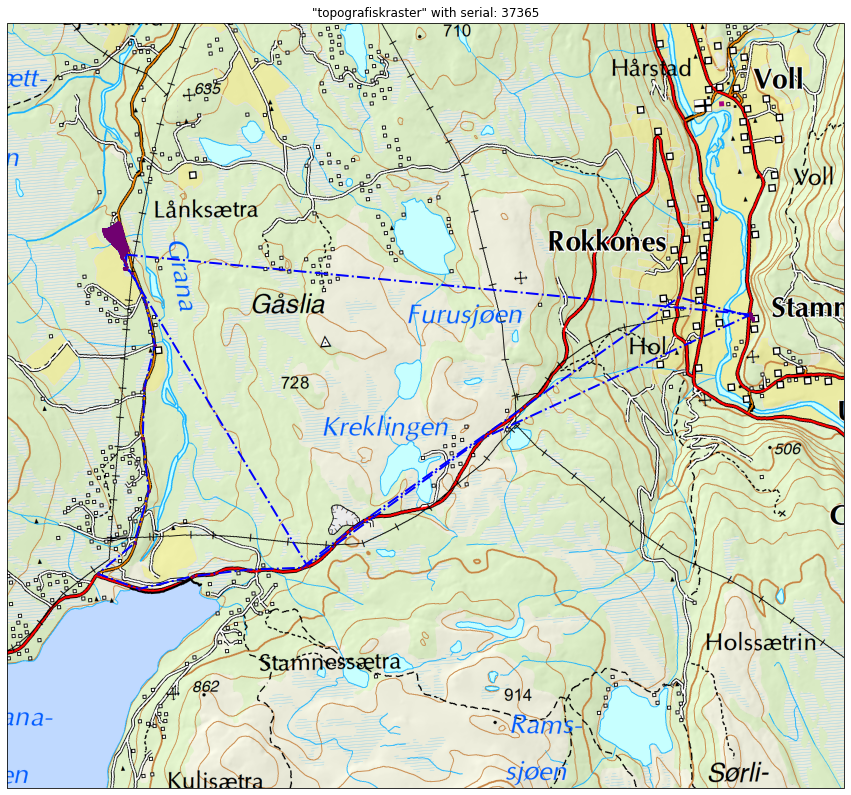

In [49]:
# Konstruer geometrisk object fra koordinatene
linestring = sgeom.LineString(zip(df_serial['Longitude'], df_serial['Latitude']))
points = list(zip(df_serial['Longitude'], df_serial['Latitude']))

# Offset: ektra verdi på max, min for koordinatene, altså jo høyere verdi jo mer zoomet ut er kartet. oppgitt i desimalgrader.
offset = 0.02

# Konstruer plot
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator.GOOGLE)

ax.add_wms(wms_link+'EPSG:900913', layer)
ax.set_extent([lonmin-offset, lonmax+offset, latmin-offset, latmax+offset], crs=ccrs.Geodetic())

ax.add_geometries([linestring], ccrs.Geodetic(), facecolor='none', edgecolor='blue', linewidth=2, linestyle='dashdot')
[ax.plot(coord[0], coord[1], transform=ccrs.Geodetic(), marker='o', color='#700070', markersize=2) for coord in points]

ax.set_title('"{0}" with serial: {1}'.format(layer, serial))
plt.show()

### Plot trimmet data

In [50]:
# Vis tilgjengelige lag i wms tjenesten
wms_link = 'https://wms.geonorge.no/skwms1/wms.nib?'
wms = WebMapService(wms_link, version='1.3.0')

print('Title: {}'.format(wms.identification.title))
print('Abstract: {}'.format(wms.identification.abstract))
print('Layers: {}'.format(list(wms.contents)))

Title: WMS
Abstract: WMS
Layers: ['ortofoto']


In [51]:
# Informasjon om valgt kartlag
layer = 'ortofoto'

print('Options: {}'.format(wms[layer].crsOptions))
print('BoundingBox: {}'.format(wms[layer].boundingBoxWGS84))
print('Styles: {}'.format(wms[layer].styles))

Options: ['EPSG:25834', 'EPSG:4326', 'EPSG:32632', 'EPSG:25835', 'EPSG:25832', 'EPSG:25833', 'CRS:84', 'EPSG:32633', 'EPSG:32635', 'EPSG:25836', 'EPSG:32634', 'EPSG:32636']
BoundingBox: (-19.999978, 56.246605, 49.999947, 80.926588)
Styles: {'default': {'title': 'ortofoto', 'legend': 'https://wms.geonorge.no/skwms1/wms.nib?request=GetLegendGraphic%26version=1.3.0%26format=image/png%26layer=ortofoto', 'legend_width': '104', 'legend_height': '60', 'legend_format': 'image/png'}}


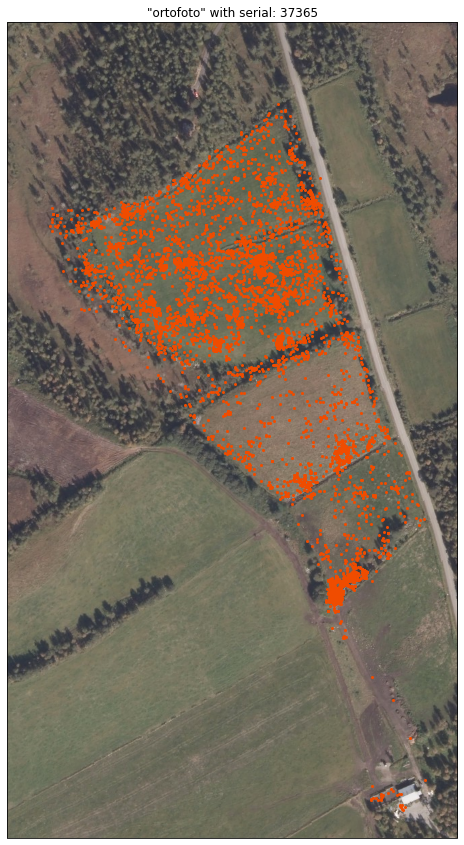

In [52]:
# Konstruer geometrisk object fra koordinatene
points = list(zip(df_serial['Longitude'], df_serial['Latitude']))

# Konstruer plot
fig = plt.figure(figsize=[15,15])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.UTM(32))

ax.add_wms(wms_link+'EPSG:32632', layer)
ax.set_extent([9.7008987, 9.7073278, 62.8594849, 62.864879], crs=ccrs.Geodetic())

[ax.plot(coord[0], coord[1], transform=ccrs.Geodetic(), marker='o', color='#f04c00', markersize=2) for coord in points]

ax.set_title('"{0}" with serial: {1}'.format(layer, serial))
plt.show()